In [24]:
import pandas as pd
import re
import nltk

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [62]:
data = pd.read_excel("data_label.xlsx", index_col=0)

data.head()

,user,Likes,Comment_clean,label
0,The TV Regent,10K,look like spidey stunt final gon na come handi,1
1,Shelbyville Rules,1.2K,cant help think fli ship wouldv made fantast l...,0
2,Goat-on-a-Stick,1.3K,extend univers spiderman hard follow,0
3,Nicholas Irizarry,255,realli hope movi well someon massiv fan game a...,1
4,z,896,look like great movi cant wait,1


In [63]:
data.shape

(99, 4)

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 98
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   user           99 non-null     object
 1   Likes          99 non-null     object
 2   Comment_clean  99 non-null     object
 3   label          99 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 3.9+ KB


In [65]:
# iris_df.isnull().values.any()
data.isna().values.any() # mendeteksi keberadaan nilai kosong

False

In [66]:
# iris_df[iris_df.duplicated(keep=False)] # tampilkan seluruh baris dengan duplikasi
data[data.duplicated()] # tampilkan hanya baris duplikasi sekunder

,user,Likes,Comment_clean,label


In [67]:
data.duplicated().value_counts() # hitung jumlah duplikasi data
# hasil: tidak ada duplikasi data

False    99
dtype: int64

In [68]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zsaffapp/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/zsaffapp/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/zsaffapp/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [71]:
lemma = WordNetLemmatizer()
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def CleanComment(txt):
  txt = re.sub(r'http\S+', ' ', txt)                                                 # hapus url
  txt = re.sub('[^a-zA-Z]','  ', txt)                                                # hapus teks tidak relevan (karakter selain a-z)
  txt = str(txt).lower()                                                             # jadikan huruf kecil semua
  txt = word_tokenize(txt)                                                           # tokenize
  txt = [item for item in txt if item not in stop_words]                             # hapus stop words
  txt = [lemma.lemmatize(word=w,pos='v') for w in txt]                               # lemmatization : mengembalikan ke bentuk dasar kata
  txt = [i for i in txt if len(i) > 2]                                               # hapus kata yang kurang dari dua huruf/karakter
  txt = ' '.join(txt)                                                                # penggabungan setiap token menjadi kalimat utuh
  return txt

data['CleanComment'] = data['Comment_clean'].apply(CleanComment)

In [72]:
data.corr() # korelasi antar kolom

,label
label,1.0


In [73]:
# iris_df.isnull().values.any()
data.isna().values.any() # mendeteksi keberadaan nilai kosong

False

In [74]:
import matplotlib.pyplot as plt # visualisasi data
import seaborn as sns # visualisasi data

# output dari visualisasi data akan diarahkan ke notebook
%matplotlib inline 

<AxesSubplot:>

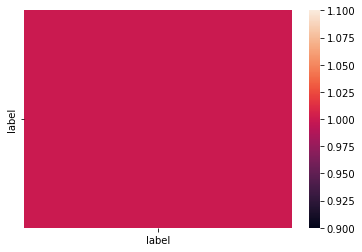

In [75]:
sns.heatmap(data=data.corr())



In [78]:
data['Comment_clean'].value_counts() # menghitung jumlah setiap species

game hold special place heart realli hope movi turn amaz                                            4
unchart favorit video game seri time realli realli hope pull would love actual good unchart movi    2
dont know enough movi stori action scene trailer mind blow                                          2
antonio bandera alway win play villain im alway entertain perform                                   2
protect defend unchart seri everyth soo hope movi doesnt disappoint                                 2
                                                                                                   ..
look like great game cant wait                                                                      1
plane action masterpiec especi unchart game deserv million award                                    1
one favorit game id alway play dad grow cant wait see                                               1
anyon els mood play unchart seri watch trailer                                    

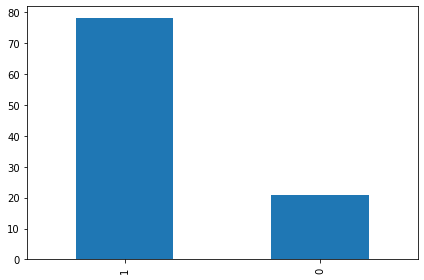

In [80]:
data['label'].value_counts().plot.bar()
plt.tight_layout()
plt.show()

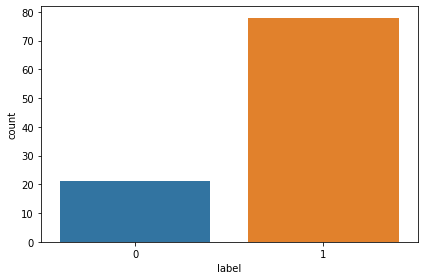

In [82]:
sns.countplot(data=data, x='label')
plt.tight_layout()
# sns.countplot?

In [83]:
from sklearn.model_selection import train_test_split # pembagi dataset menjadi training dan testing set
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report # evaluasi performa model

In [86]:
# melabelkan data menjadi 2 kategori
def pelabelan(rate):
  if rate < 1:
    return 'negatif'
  else:
    return 'positif'

data['Label_huruf'] = data['label'].apply(pelabelan)
data.head()

,user,Likes,Comment_clean,label,CleanComment,Label_huruf
0,The TV Regent,10K,look like spidey stunt final gon na come handi,1,look like spidey stunt final gon come handi,positif
1,Shelbyville Rules,1.2K,cant help think fli ship wouldv made fantast l...,0,cant help think fli ship wouldv make fantast l...,negatif
2,Goat-on-a-Stick,1.3K,extend univers spiderman hard follow,0,extend univers spiderman hard follow,negatif
3,Nicholas Irizarry,255,realli hope movi well someon massiv fan game a...,1,realli hope movi well someon massiv fan game a...,positif
4,z,896,look like great movi cant wait,1,look like great movi cant wait,positif


In [90]:
# split x dan y
x = data['CleanComment']
y = data['label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [91]:
y_test

52    1
2     0
31    0
72    1
55    1
34    1
76    1
74    1
7     1
71    0
61    1
85    1
82    0
59    1
25    1
88    1
87    1
28    1
17    0
11    1
Name: label, dtype: int64

In [92]:
# perform count vectorizer
vectorizer = CountVectorizer()
vectorizer.fit(x_train)

CountVectorizer()

In [93]:
# x_train
x_train = vectorizer.transform(x_train)
x_test = vectorizer.transform(x_test)

In [94]:
x_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [95]:
for c in [0.01, 0.05, 0.25, 0.5, 0.75,  1]:
  svm = LinearSVC(C=c)
  svm.fit(x_train, y_train)
  print('Akurasi untuk c = %s: %s' %(c, accuracy_score(y_test, svm.predict(x_test))))

Akurasi untuk c = 0.01: 0.75
Akurasi untuk c = 0.05: 0.8
Akurasi untuk c = 0.25: 0.8
Akurasi untuk c = 0.5: 0.8
Akurasi untuk c = 0.75: 0.8
Akurasi untuk c = 1: 0.75


In [96]:
svm = LinearSVC(C = 0.25)
svm.fit(x_train, y_train)

LinearSVC(C=0.25)

In [97]:
print('Accuracy score model final: %s ' %accuracy_score(y_test, svm.predict(x_test)))

Accuracy score model final: 0.8 


In [98]:
y_pred = svm.predict(x_test)
print('Accuracy of SVM classifier on test set: {:.2f}'.format(svm.score(x_test, y_test)))

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))

Accuracy of SVM classifier on test set: 0.80
[[ 2  3]
 [ 1 14]]
              precision    recall  f1-score   support

           0       0.67      0.40      0.50         5
           1       0.82      0.93      0.87        15

    accuracy                           0.80        20
   macro avg       0.75      0.67      0.69        20
weighted avg       0.78      0.80      0.78        20



In [99]:
from sklearn.neighbors import KNeighborsClassifier

In [100]:
k_range = list(range(1,26))
scores = []
for k in k_range:
    model_knn = KNeighborsClassifier(n_neighbors=k) # konfigurasi algoritma
    model_knn.fit(x_train, y_train) # training model/classifier
    y_pred = model_knn.predict(x_test) # melakukan prediksi
    scores.append(accuracy_score(y_test, y_pred)) # evaluasi performa

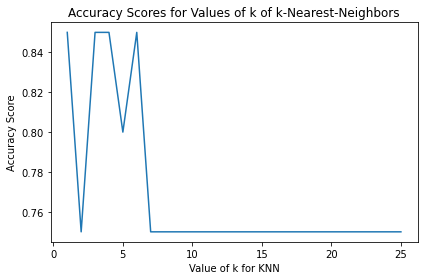

In [101]:
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.tight_layout()
plt.show()

In [102]:
model_knn = KNeighborsClassifier(n_neighbors=3) # konfigurasi algoritma
model_knn.fit(x_train,y_train) # training model/classifier
y_pred = model_knn.predict(x_test) # melakukan prediksi

In [103]:
print(accuracy_score(y_test, y_pred)) # evaluasi akurasi

0.85


In [104]:
print(classification_report(y_test, y_pred)) # evaluasi klasifikasi

              precision    recall  f1-score   support

           0       1.00      0.40      0.57         5
           1       0.83      1.00      0.91        15

    accuracy                           0.85        20
   macro avg       0.92      0.70      0.74        20
weighted avg       0.88      0.85      0.82        20



In [105]:
from sklearn.linear_model import LogisticRegression

In [106]:
# model_logreg = LogisticRegression()
model_logreg = LogisticRegression(solver='lbfgs', multi_class='auto')
model_logreg.fit(x_train,y_train)
y_pred = model_logreg.predict(x_test)

In [107]:
print(accuracy_score(y_test, y_pred))

0.85


In [108]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.40      0.57         5
           1       0.83      1.00      0.91        15

    accuracy                           0.85        20
   macro avg       0.92      0.70      0.74        20
weighted avg       0.88      0.85      0.82        20



In [109]:
from sklearn.svm import SVC

In [110]:
# model_svc = SVC()
model_svc = SVC(gamma='scale')
model_svc.fit(x_train,y_train)
y_pred = model_svc.predict(x_test)

In [111]:
from sklearn.tree import DecisionTreeClassifier

In [112]:
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train,y_train)
y_pred = model_dt.predict(x_test)

In [113]:
from sklearn.ensemble import RandomForestClassifier

In [114]:
# model_rf = RandomForestClassifier()
model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(x_train,y_train)
pred_rf = model_rf.predict(x_test)

In [115]:
models = [model_knn, model_logreg, model_svc, model_dt, model_rf]
accuracy_scores = []
for model in models:
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
print(accuracy_scores)

[0.85, 0.85, 0.75, 0.75, 0.85]


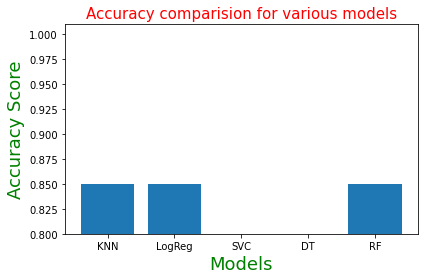

In [116]:
plt.bar(['KNN', 'LogReg', 'SVC', 'DT', 'RF'],accuracy_scores)
plt.ylim(0.80,1.01)
plt.title('Accuracy comparision for various models', fontsize=15, color='r')
plt.xlabel('Models', fontsize=18, color='g')
plt.ylabel('Accuracy Score', fontsize=18, color='g')
plt.tight_layout()
plt.show()